### 요구사항 분석
- Porsitive/Negative Sengiment에 각각 해당하는 단어를 모아 wordcloud 표시
    - Positive : target = 4
    - Neutral  : target = 2
    - Negative : target = 0
- wordcloud를 만들 때 사용할 단어는 Sampling으로 선택
- 하나의 wordcloud에는 최대 200개의 단어만 표시
- 이때, 두 개의 wordcloud는 하나의 plot에 표시

### 추가 학습
- 머신러닝 알고리즘을 사용한 Twitter 데이터 기반 선거 결과 예측
    - Twitter 데이터 정보 수집 및 감성 분석을 통해 정치적 성향을 분석하고, 선거 결과 예측
    - 훈련 데이터셋은 긍정적 트윗 3750개, 부정적 트윗 3750개 활용했으며, 모델은 SVM 활용 -> 94.2% 정확도
- 느낀 점
    - 현재 우리나라에서도 여론조사와 출구조사를 통해 투표 결과를 예측하지만, AI 모델을 활용하여 더 쉽고 빠르게 정확도 높은 투표 결과를 예측할 수 있다는게 신기했다.
    - 반대로, 우리가 SNS에 작성하는 글이 무분별하게 쓰일 수 있다는 것이고, 이에 대한 방안도 필요하다고 생각한다.

## Tweets Wordcloud

### import, variables

In [77]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
data_path = "/Users/admin/Desktop/Softeer_DE/data/sentiment140.csv"

### Data 탐색
- 데이터 타입/개수, Null 여부
- 각 target 별 데이터 수 (Neg, Neu, Pos)

In [19]:
data = pd.read_csv(data_path, header=None, encoding='latin1', names=['target','id','date','flag','user','text'])

In [43]:
data.head(3)

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [23]:
data.columns

Index(['target', 'id', 'date', 'flag', 'user', 'text'], dtype='object')

In [42]:
print(f'Total    Rows : {len(data)}') 
print(f'Negative Rows : {len(data[data["target"] == 0])}')
print(f'Neutral  Rows : {len(data[data["target"] == 2])}')
print(f'Positive Rows : {len(data[data["target"] == 4])}')

Total    Rows : 1600000
Negative Rows : 800000
Neutral  Rows : 0
Positive Rows : 800000


### Data Sampling
- 무작위 추출로 20% 표본 추출 진행
    - Negative 20% (160000)
    - Positive 20% (160000)

In [65]:
negative_data = data[data['target'] == 0]
positive_data = data[data['target'] == 4]

In [66]:
sample_negative_data = negative_data.sample(frac=0.2, random_state=64)
sample_positive_data = positive_data.sample(frac=0.2, random_state=64)

In [67]:
print(f'Negative Rows : {len(sample_negative_data)}')
print(f'Neutral  Rows : {len(sample_positive_data)}')

Negative Rows : 160000
Neutral  Rows : 160000


### Visualization
- 샘플 데이터를 text로 연결한 뒤 generate 및 wordcloud 생성

In [69]:
negative_text = ' '.join(sample_negative_data['text'].astype(str))
positive_text = ' '.join(sample_positive_data['text'].astype(str))

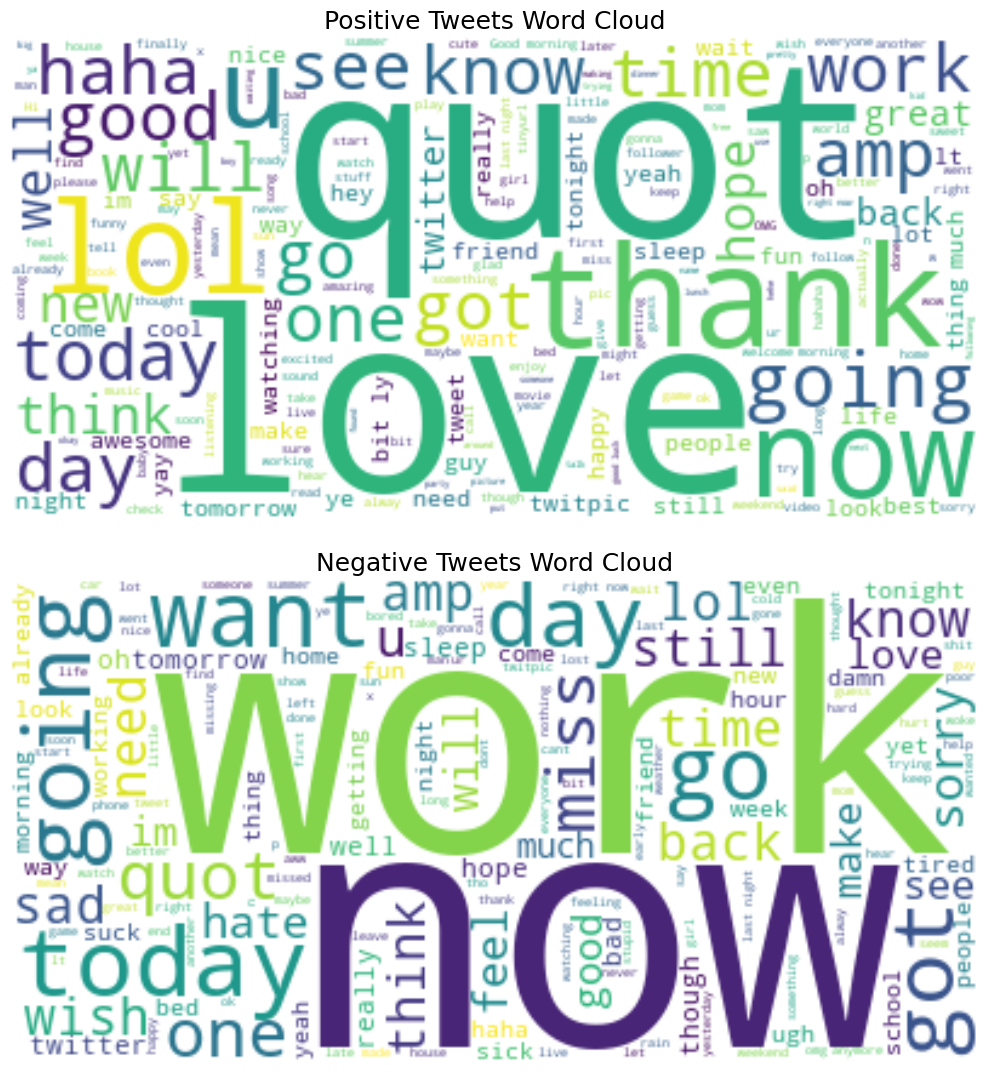

In [78]:
# 워드클라우드 생성
wordcloud_neg = WordCloud(background_color='white', max_words=200).generate(negative_text)
wordcloud_pos = WordCloud(background_color='white', max_words=200).generate(positive_text)

# subplot으로 표시 (2행 1열)
plt.figure(figsize=(10, 11))

# Positive 워드클라우드
plt.subplot(2, 1, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Tweets Word Cloud', fontsize=18)

# Negative 워드클라우드
plt.subplot(2, 1, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Tweets Word Cloud', fontsize=18)

plt.tight_layout()
plt.show()